# Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.append('..')

In [4]:
import pyFish
from pyFish.tests import load_sample_data
pyFish.__version__

ZMQInteractiveShell


'1.14'

# Load Sample data

In [5]:
data = load_sample_data('data/model_data/vector/ternary.csv')
Mx = data[:,0]
My = data[:,1]
tint = 0.12

# To run the analysis
### Initialize object with parameters
<code>pyFish.Characterize(
    data,
    t,
    t_int=None,
    dt='auto',
    delta_t=1,
    t_lag=1000,
    inc=0.01,
    inc_x=0.1,
    inc_y=0.1,
    max_order=10,
    fft=True,
    drift_order=None,
    diff_order=None,
    order_metric='R2_adj',
    simple_method=True,
    n_trials=1,
    **kwargs,
)
</code>
<details>
    <summary>
     Show more help
    </summary>

Input params:
--------------
<div class="alert alert-block alert-info">
    **data** : list

    time series data to be analysed, data = [x] for scalar data and data = [x1, x2] for vector
    where x, x1 and x2 are of numpy.array object type
    
**t** : numpy.array

    time stamp of time series

**t_int** : float

    time increment between consecutive observations of the time series
    
**dt** = 'auto' : 'auto' or int

    time scale to run the analysis on (for determinsitic part);
    algorithm estimates dt if 'auto' is passed, else takes the user input
    
**delta_t** = 1 : int

    time scale to run the analysis on (for stochastic part)
    
**inc** = 0.01 : float

    increment in order parameter for scalar data
    
**inc_x** = 0.1 : float

    increment in order parameter for vector data x1
    
**inc_y** = 0.1 : float

    increment in order parameter for vector data x2
    
**drift_order** = None : int

    order of polynomial to be fit for calculated drift (deterministic part);
    if None, algorithim estimates the optimium drift_order
    
**diff_order** = None : int

    order of polynomial to be fit for calculated diff (stochastic part);
    if None, algorithim estimates the optimium diff_order
    
**max_order** = 10 : int

    maxmium drift_order and diff_order to consider
    
**fft** = True : bool

    if true use fft method to calculate autocorrelation else, use standard method
    
**t_lag** = 1000 : int

    maxmium lag to use to calculate acf

****kwargs** 
    all the parameters for pyFish.preporcessing and pyFish.noise_analysis

</div>
    
returns:
-----------
<div class="alert alert-block alert-success">

**output** : pyFish.output

    object to access the analysed data, parameters, plots and save them.
</div>
</details>

| Data Type : False        | Autocorellation time : 297    | Gaussian Noise : True    |
| M range : (-1.0, 1.0)    | M mean : 0.0               | |M| mean : 0.49          |

module://ipykernel.pylab.backend_inline
10.0


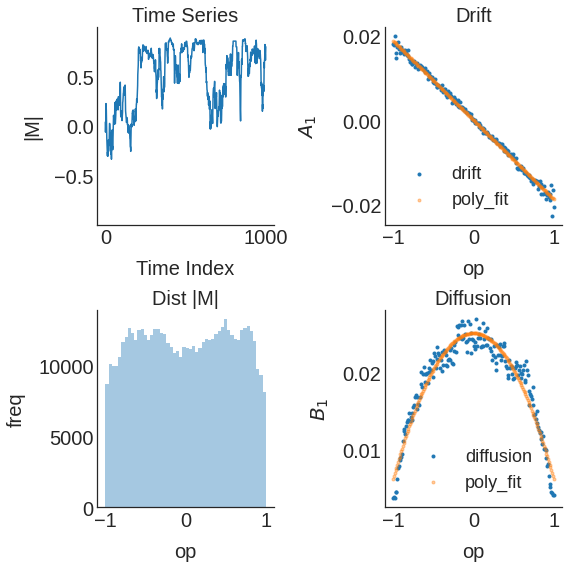

In [9]:
import pyFish
ch2 = pyFish.Characterize(data=[Mx], t=0.12)
ch2.summary()
data2 = [ch2._data_X, ch2._data_avgdrift, ch2._data_avgdiff, ch2.drift_order, ch2.diff_order]

Generating Slider data: 100%|██████████| 8/8 [00:15<00:00,  1.89s/it]


| Data Type : True       | Autocorrelation time : 35     | Gaussian Nonse : True   |
| Mx range  : (-1.0, 1.0)| My range : (-1.0, 1.0)        | range |M| : (0.0, 1.0)  |
| Mx mean : 0.0        | My mean : 0.02               | M mean : 0.78           |
module://ipykernel.pylab.backend_inline
10.0


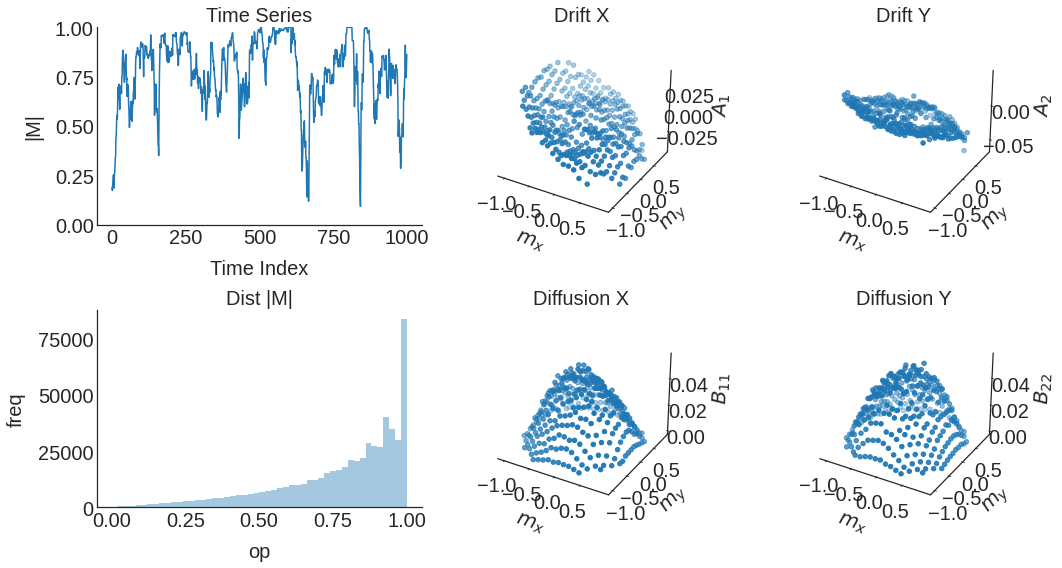

In [10]:
import pyFish
ch = pyFish.Characterize([Mx, My], t=tint)
ch.summary()
data = [ch._data_Mx, ch._data_My, ch._data_avgdriftX, ch._data_avgdriftY, ch._data_avgdiffX, ch._data_avgdiffY]

In [13]:
def plot_data(data_in,
               title='title',
               x_label='$m_x$',
               y_label='$m_y$',
               z_label='z',
               ax=None,
               clear=True,
               plot_plane=False,
               font_size=18,
               title_font_size=20,
               label_size=20,
               label_pad=12,
               label=None,
               order=3,
               m=False,
               m_th=2,
               dpi=150,
               heatmap=False):
    fig = None
    if heatmap:
        return self._plot_heatmap(data_in, title=title)
    if ax is None:
        fig = plt.figure(dpi=dpi)
        ax = fig.add_subplot(projection="3d")
    data = data_in.copy()
    mask = np.where(((data > m_th * np.nanstd(data)) |
                     (data < -m_th * np.nanstd(data))))
    if m:
        #print(mask)
        data[mask] = np.nan
    if clear:
        ax.cla()
    #op_x = self.op_x.copy()
    #op_y = self.op_y.copy()
    op_x = np.arange(-1,1,0.1)
    op_y = np.arange(-1,1,0.1)
    
    plane = []
    if plot_plane:
        plane_id, plane = self._thrace_pane(data)

    x, y = np.meshgrid(op_x, op_y)
    z = data.copy()
    ax.set_title(title, fontsize=title_font_size)

    ax.scatter3D(x, y, z.ravel(), label=label)
    if plot_plane:
        if plane_id:
            #print('Plane 2')
            ax.plot_surface(
                y,
                x,
                plane,
                rstride=1,
                cstride=1,
                alpha=0.5,
            )
        else:
            #print('Plane 1')
            ax.plot_surface(
                x,
                y,
                plane,
                rstride=1,
                cstride=1,
                alpha=0.5,
            )
    ax.set_xlabel(x_label, fontsize=label_size, labelpad=label_pad)
    ax.set_ylabel(y_label, fontsize=label_size, labelpad=label_pad)
    ax.set_zlabel(z_label, fontsize=label_size, labelpad=label_pad)
    # make the panes transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
    ax.yaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
    ax.zaxis._axinfo["grid"]['color'] = (1, 1, 1, 0)
    #Set ticks lable and its fontsize
    ax.tick_params(axis='both', which='major', labelsize=label_size)
    ax.set_xticks(np.linspace(-1, 1, 5))
    ax.set_yticks(np.linspace(-1, 1, 5))
    #plt.tight_layout()
    #plt.legend(prop={'size': 14})
    return fig, ax

In [14]:
def stylize_axes(ax, x_label=None, y_label=None, title=None, font_size=18, title_font_size=20, label_size=20, label_pad=12):
    # Hide the top and right spines of the axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)    
    
    ax.set_title(title, fontsize=title_font_size)
    
    ax.set_xlabel(x_label, fontsize=label_size, labelpad=label_pad)
    ax.set_ylabel(y_label, fontsize=label_size, labelpad=label_pad)
    ax.tick_params(axis='both', which='major', labelsize=label_size)
    
    return None

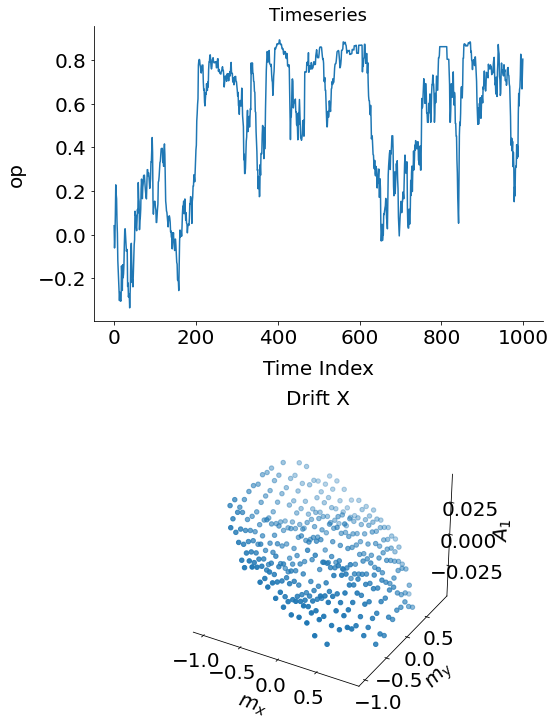

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,10), dpi=None)
ax[0].plot(ch._data_Mx[0:1000])
stylize_axes(ax[0], x_label='Time Index', y_label='op', title='TimeSeries')
ax[0].set_title('Timeseries', fontsize=18)
ax[1].remove()
ax[1] = fig.add_subplot(2,1,2,projection='3d')
#ax[1] = fig.add_axes(projection = '3d')
_, ax[1] = plot_data(ch._data_avgdriftX,
                               ax=ax[1],
                               title='Drift X',
                               z_label='$A_{1}$')
plt.tight_layout()

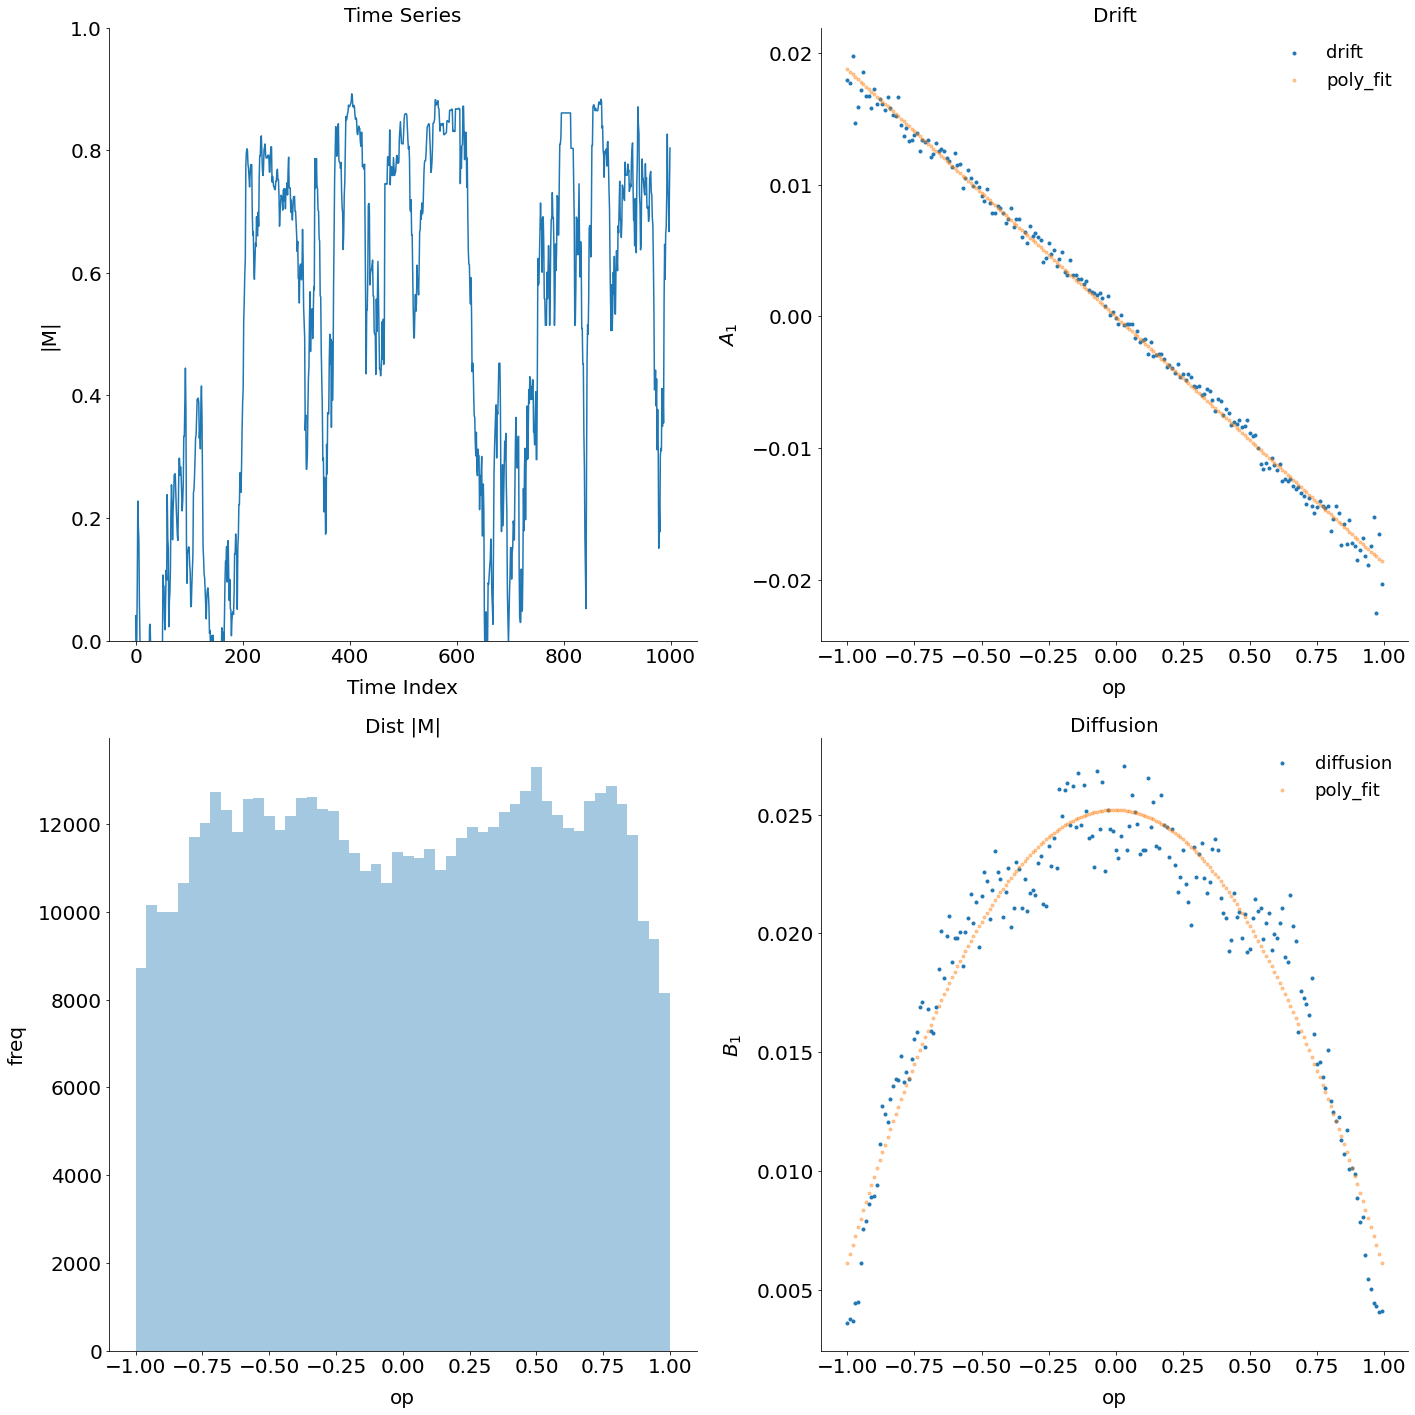

In [19]:
def p_data(data, vector=True, kde=False, font_size=18, title_font_size=20, label_size=20, label_pad=12, timeseries_start=0, timeseries_end=1000):
    if vector:
        Mx, My, driftX, driftY, diffX, diffY = data
        M = np.sqrt(Mx**2 + My**2)
        fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(30,15))
    #TimeSeries
        ax[0][0].plot(range(timeseries_start, timeseries_end), M[timeseries_start:timeseries_end])
        ax[0][0].set_ylim(0,1)
        stylize_axes(ax[0][0],x_label='Time Index',y_label='|M|', title='Time Series', font_size=font_size, title_font_size=title_font_size, label_size=label_size, label_pad=label_pad)

    #Dist |M|
        sns.distplot(M, kde=kde, ax=ax[1][0])
        stylize_axes(ax[1][0],x_label='op',y_label='freq', title='Dist |M|', font_size=font_size, title_font_size=title_font_size, label_size=label_size, label_pad=label_pad)

    #Drift X
        ax[0][1].remove()
        ax[0][1] = fig.add_subplot(2,3,2, projection='3d')
        _, ax[0][1] = plot_data(driftX,ax=ax[0][1],title="Drift X",x_label='$m_{x}$',y_label='$m_{y}$',z_label='$A_{1}$', font_size=font_size, title_font_size=title_font_size, label_size=label_size, label_pad=label_pad)

    #Drift Y
        ax[0][2].remove()
        ax[0][2] = fig.add_subplot(2,3,3, projection='3d')
        _, ax[0][2] = plot_data(driftY,ax=ax[0][2],title="Drift Y",x_label='$m_{x}$',y_label='$m_{y}$',z_label='$A_{2}$', font_size=font_size, title_font_size=title_font_size, label_size=label_size, label_pad=label_pad) 

    #Diffusion X
        ax[1][1].remove()
        ax[1][1] = fig.add_subplot(2,3,5, projection='3d')
        _, ax[1][1] = plot_data(diffX,ax=ax[1][1],title="Diffusion X",x_label='$m_{x}$',y_label='$m_{y}$',z_label='$B_{11}$', font_size=font_size, title_font_size=title_font_size, label_size=label_size, label_pad=label_pad) 

    #Diffusion Y
        ax[1][2].remove()
        ax[1][2] = fig.add_subplot(2,3,6, projection='3d')
        _, ax[1][2] = plot_data(diffY,ax=ax[1][2],title="Diffusion Y",x_label='$m_{x}$',y_label='$m_{y}$',z_label='$B_{22}$', font_size=font_size, title_font_size=title_font_size, label_size=label_size, label_pad=label_pad) 

        plt.tight_layout()
    
    else:
    #Time Series
        M, drift, diff, drift_order, diff_order = data
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
        ax[0][0].plot(range(timeseries_start, timeseries_end), M[timeseries_start: timeseries_end])
        ax[0][0].set_ylim(0,1)
        stylize_axes(ax[0][0],x_label='Time Index',y_label='|M|', title='Time Series', font_size=font_size, title_font_size=title_font_size, label_size=label_size, label_pad=label_pad)
    
    #Dist |M|
        sns.distplot(M, kde=kde, ax=ax[1][0])
        stylize_axes(ax[1][0],x_label='op',y_label='freq', title='Dist |M|', font_size=font_size, title_font_size=title_font_size, label_size=label_size, label_pad=label_pad)
    
    #Drift
        p_drift, _ = ch2._fit_poly(ch2.op, drift, drift_order)
        ax[0][1].scatter(ch2.op, drift, marker='.', label='drift')
        ax[0][1].scatter(ch2.op, p_drift(ch2.op), marker='.', alpha=0.4, label='poly_fit')
        stylize_axes(ax[0][1],x_label='op',y_label='$A_{1}$', title='Drift', font_size=font_size, title_font_size=title_font_size, label_size=label_size, label_pad=label_pad)
        ax[0][1].legend(frameon=False, fontsize=font_size)
    #Diffusion
        p_diff, _ = ch2._fit_poly(ch2.op, diff, diff_order)
        ax[1][1].scatter(ch2.op, diff, marker='.', label='diffusion')
        ax[1][1].scatter(ch2.op, p_diff(ch2.op), marker='.', alpha=0.4, label='poly_fit')
        stylize_axes(ax[1][1],x_label='op',y_label='$B_{1}$', title='Diffusion', font_size=font_size, title_font_size=title_font_size, label_size=label_size, label_pad=label_pad)
        ax[1][1].legend(frameon=False, fontsize=font_size)
        
        plt.tight_layout()
    return fig
f = p_data(data2, vector=False)

In [17]:
def plot_summary(data,
                      vector=True,
                      dpi=150,
                      kde=False,
                      start=0,
                      stop=1000):
    
    plt.rcParams['font.size'] = 18
        
    if not vector:
        M, drift, diff, drift_order, diff_order = data

        fig = plt.figure(dpi=dpi, figsize=(20, 20))

        plt.subplot(2, 2, 1)
        plt.plot(M[start:stop])
        plt.title('Timeseries', fontsize=16)
        plt.ylabel("|M|", fontsize=16)
        plt.xlabel('Time index', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

        plt.subplot(2, 2, 2)
        sns.distplot(M, kde=kde)
        plt.title("Dist M", fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

        plt.subplot(2, 2, 3)
        p_drift, _ = self._fit_poly(self.op, drift, drift_order)
        plt.scatter(self.op, drift, marker='.')
        plt.scatter(self.op, p_drift(self.op), marker='.', alpha=0.4)
        plt.title("Drift", fontsize=16)
        plt.xlabel('Order Parameter', fontsize=16)
        plt.ylabel("$A_{1}$", fontsize=16)
        plt.xlim([min(M), max(M)])
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

        plt.subplot(2, 2, 4)
        p_diff, _ = self._fit_poly(self.op, diff, diff_order)
        plt.scatter(self.op, diff, marker='.')
        plt.scatter(self.op, p_diff(self.op), marker='.', alpha=0.4)
        plt.title("Diffusion", fontsize=16)
        plt.xlim([min(M), max(M)])
        plt.xlabel("Order Parameter", fontsize=16)
        plt.ylabel('$B_{11}$', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

    else:
        Mx, My, driftX, driftY, diffX, diffY = data
        M = np.sqrt(Mx**2 + My**2)

        fig = plt.figure(figsize=(30, 15))

        plt.subplot(2, 3, 1)
        plt.plot(M[start:stop])
        plt.title('TimeSeries')
        plt.ylabel("|M|")
        plt.xlabel('Time Index')
        #plt.xticks(fontsize=14)
        #plt.yticks(fontsize=14)

        plt.subplot(2, 3, 4)
        sns.distplot(M, kde=kde)
        plt.title('Dist |M|')
        #plt.xticks(fontsize=14)
        #plt.yticks(fontsize=14)

        ax_driftX = plt.subplot(2, 3, 2, projection='3d')
        _, ax_driftX = ch._plot_data(driftX,
                                       ax=ax_driftX,
                                       title=None,
                                       z_label='$A_{1}$')
        plt.title('Drift X')

        ax_driftY = plt.subplot(2, 3, 3, projection='3d')
        _, ax_driftY = ch._plot_data(driftY,
                                       ax=ax_driftY,
                                       title=None,
                                       z_label='$A_{2}$')
        plt.title('Drift Y')

        ax_diffX = plt.subplot(2, 3, 5, projection='3d')
        _, ax_diffX = ch._plot_data(diffX,
                                      ax=ax_diffX,
                                      title=None,
                                      z_label='$B_{11}$')
        plt.title('Diff X')

        ax_diffY = plt.subplot(2, 3, 6, projection='3d')
        _, ax_diffY = ch._plot_data(diffY,
                                      ax=ax_diffY,
                                      title=None,
                                      z_label='$B_{22}$')
        plt.title('Diff Y')
    return fig

# TimeSeries

In [ ]:
ch.timeseries()

# Histograms

In [ ]:
ch.histogram()

# Drift

In [ ]:
ch.drift()

# Diffusion

In [ ]:
ch.diffusion()

# Get analysed data
<code>pyFish.output.data()</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">

Input params:
--------------
**None**
</div>
    
<div class="alert alert-block alert-success">
    
returns:
--------------
**data** : list

        if vector [drift, diff, avgdrift, avgdiff, op]
        else, [avgdriftX, avgdriftY, avgdiffX, avgdiffY, avgdiffXY, op_x, op_y] 
</div>
</details>

In [ ]:
avgdriftX, avgdriftY, avgdiffX, avgdiffY, avgdiffXY, op_x, op_y = ch.data()
len(avgdriftX), len(avgdriftY), len(avgdiffX), len(avgdiffY), len(avgdiffXY), len(op_x), len(op_y)

# To view parameters
<code>pyFish.output.parameters(
    save=False, 
    savepath=None, 
    file_name='parameters.txt'
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">
    
Input params:
--------------

**save** : bool

        if True, save parameters to file

**savepath** : str

        save destination path, if None, data is saved in current/working/directory/results
        
**file_name** = 'parameters.txt' : str

        name of the file
</div>
<div class="alert alert-block alert-success">
    
returns:
------------
**params** : dict, json
    
        all parameters used and calculated during analysis
</div>
</details>

In [ ]:
parameters = ch.parameters()
parameters

# To show data plots
<code>pyFish.output.visualize(
    show=True, 
    save=False, 
    savepath=None
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">
    
Input params:
--------------
**show** = True : bool

        if True, show the figures 
**save** = False : bool

        if True save the figures to disk
**savepath** = None : str

        save destination path, if None, data is saved in current/working/directory/results/visualize
</div>
<div class="alert alert-block alert-success">
    
returns:
-------------
        None
</div>
</details>

In [ ]:
ch.visualize()

# To show graphs used to estimate the time scale dt
<code>pyFish.output.diagnostics(
    show=True, 
    save=False, 
    savepath=None
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">

Input params:
--------------
**show** = True : bool
    
        if True, show the figures 
**save** = False : bool
    
        if True save the figures to disk
**savepath** = None : str
    
        save destination path, if None, data is saved in current/working/directory/results/diagnostics
</div>
<div class="alert alert-block alert-success">

returns:
-------------
    None
</div>
</details>

In [ ]:
 ch.diagnostic()

# Noise Characterstics plots
<code>pyFish.output.noise_characterstics(
    show=True, 
    save=False, 
    savepath=None
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">
    
Input params:
--------------
**show** = True : bool

        if True, show the figures 
**save** = False : bool

        if True save the figures to disk
**savepath** = None : str

        save destination path, if None, data is saved in 
        current/working/directory/results/noise_characterstics
</div>
<div class="alert alert-block alert-success">
    
returns:
--------------
        None
</div>
</details>

In [ ]:
ch.noise_characterstics()

# To save data to disk
<code>pyFish.output.save_data(
    file_name=None, 
    savepath=None, 
    savemat=True
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">

Input params:
--------------
**file_name** : str

        name of the file, if None, file name will be the time a which the data was analysed
**savepath** : str

        destination path to save data, if None, files will me saved in current/working/directory/results
**savemat** : bool

        if True also saves the data in matlab compatable (.mat) format.
</div>
<div class="alert alert-block alert-success">

returns:
-------------
        None
</div>
</details>

In [ ]:
ch.save_data()

# To save the data along with plots
<code>pyFish.output.save_all_data(
    savepath=None, 
    show=False, 
    file_name=None
    )
</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">

Input params:
--------------
**show** : bool

        if True, shows the figure
**file_name** : str

        name of the files, if None, time at which data was analysed is consideres as file name
**savepath** : str

        save destination path, if None, data is saved in current/working/directory/results
</div>
<div class="alert alert-block alert-success">

returns:
-------------
        None
</div>
</details>

In [ ]:
#ch.save_all_data()

# To release the memory used
> Useful while multiple datafiles in loop

<code>pyFish.output.release()</code>
<details>
    <summary>
     Show more help
    </summary>
<div class="alert alert-block alert-info">

Input params:
--------------
    None
</div>
<div class="alert alert-block alert-success">

returns:
--------------
    None
</div>
</details>

In [ ]:
ch.release()